In [ ]:
# Install required packages
!pip install git+https://github.com/speechbrain/speechbrain.git@develop
!pip install datasets==3.5.0

  Cloning https://github.com/speechbrain/speechbrain.git (to revision develop) to /tmp/pip-req-build-p5t1va56
  Running command git clone --filter=blob:none --quiet https://github.com/speechbrain/speechbrain.git /tmp/pip-req-build-p5t1va56
  Resolved https://github.com/speechbrain/speechbrain.git to commit 96b00ca4652f723688635c0cd40bf2366451a046
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


NADI 2025 ARABIC DIALECT IDENTIFICATION
COMPREHENSIVE DATA EXPLORATION & VISUALIZATION
BASIC DATASET STATISTICS
Train set size: 12,900
Validation set size: 12,700
Test set size: 6,268
Total dataset size: 31,868

Number of unique countries/dialects:
Train: 8
Validation: 8


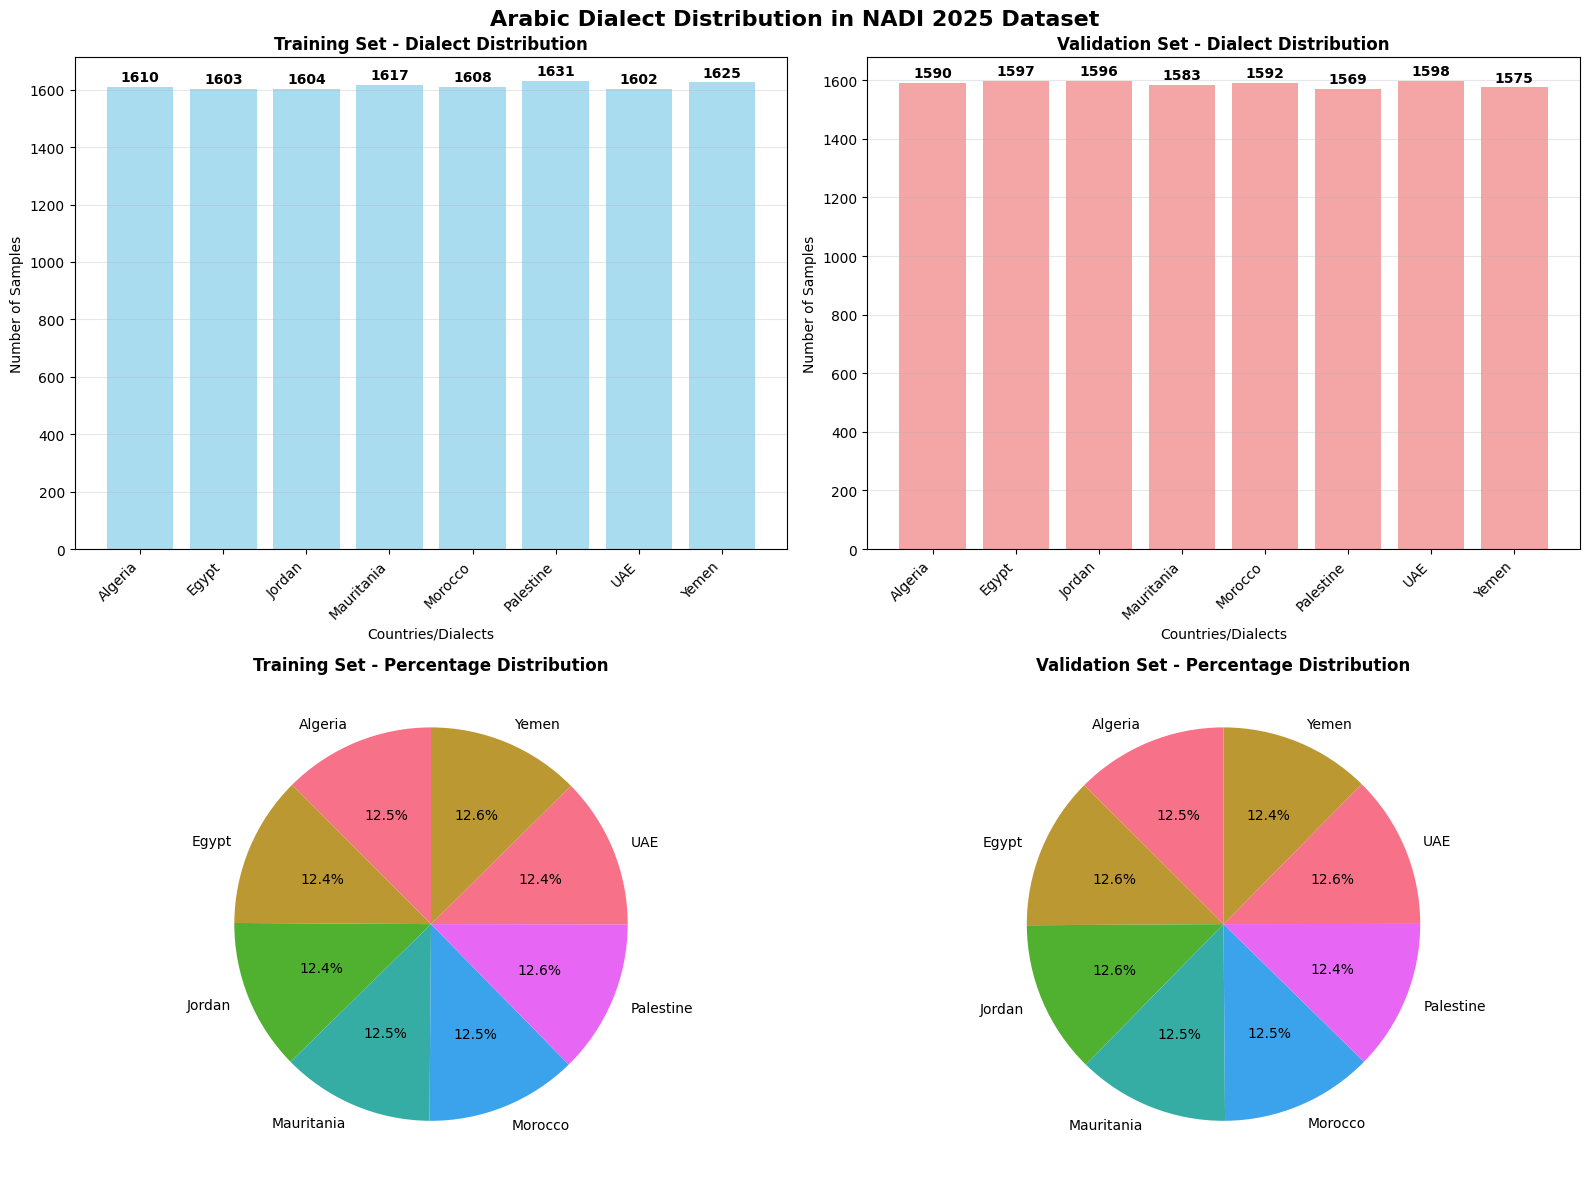


DETAILED COUNTRY/DIALECT STATISTICS

Training Set:
  Palestine: 1,631 samples (12.6%)
  Yemen: 1,625 samples (12.6%)
  Mauritania: 1,617 samples (12.5%)
  Algeria: 1,610 samples (12.5%)
  Morocco: 1,608 samples (12.5%)
  Jordan: 1,604 samples (12.4%)
  Egypt: 1,603 samples (12.4%)
  UAE: 1,602 samples (12.4%)

Validation Set:
  UAE: 1,598 samples (12.6%)
  Egypt: 1,597 samples (12.6%)
  Jordan: 1,596 samples (12.6%)
  Morocco: 1,592 samples (12.5%)
  Algeria: 1,590 samples (12.5%)
  Mauritania: 1,583 samples (12.5%)
  Yemen: 1,575 samples (12.4%)
  Palestine: 1,569 samples (12.4%)

AUDIO CHARACTERISTICS ANALYSIS
Analyzing audio characteristics from 200 random samples...

Audio Duration Statistics:
  Mean duration: 4.25 seconds
  Median duration: 3.56 seconds
  Min duration: 1.04 seconds
  Max duration: 15.12 seconds
  Std duration: 2.79 seconds

Sample Rate Statistics:
  Unique sample rates: [16000]
  Most common sample rate: (np.int64(16000), 200)


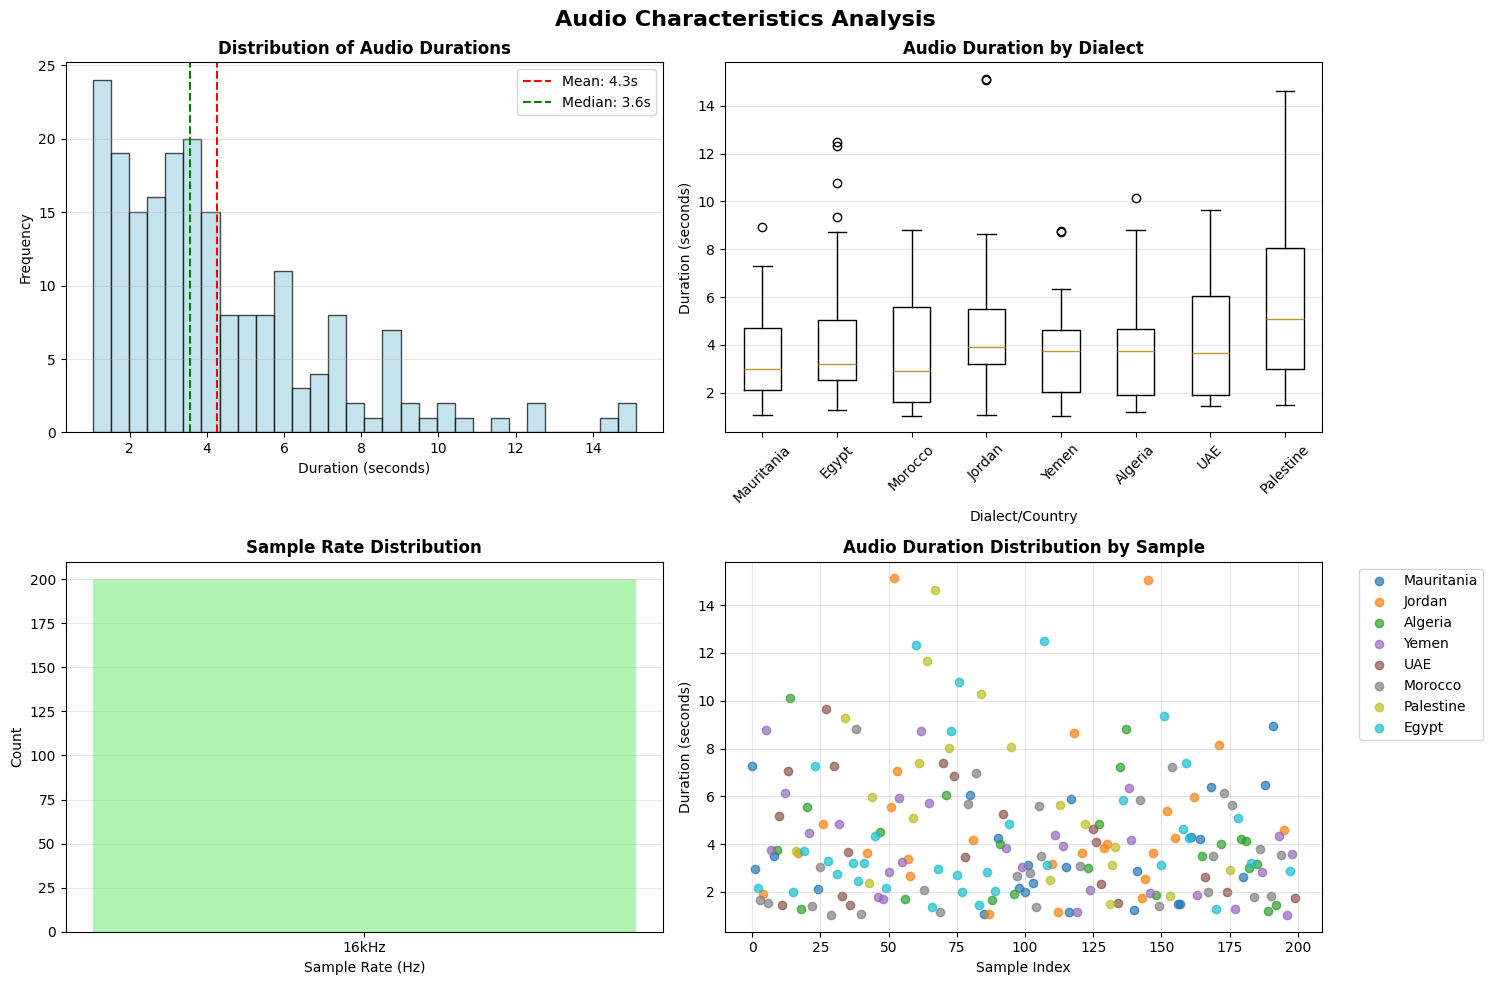


DATASET SUMMARY TABLE
Dialect/Country  Train Samples  Val Samples  Total Samples Train % Val %
        Algeria           1610         1590           3200   12.5% 12.5%
          Egypt           1603         1597           3200   12.4% 12.6%
         Jordan           1604         1596           3200   12.4% 12.6%
     Mauritania           1617         1583           3200   12.5% 12.5%
        Morocco           1608         1592           3200   12.5% 12.5%
      Palestine           1631         1569           3200   12.6% 12.4%
            UAE           1602         1598           3200   12.4% 12.6%
          Yemen           1625         1575           3200   12.6% 12.4%

OVERALL STATISTICS
Total unique dialects: 8
Total training samples: 12,900
Total validation samples: 12,700
Average samples per dialect: 3200
Audio duration range: 1.0s - 15.1s
Average audio duration: 4.3s

SAMPLE AUDIO VISUALIZATIONS (3 samples)
Sample 1: Algeria - Duration: 1.69s
Sample 2: Egypt - Duration: 5.71s
Sa

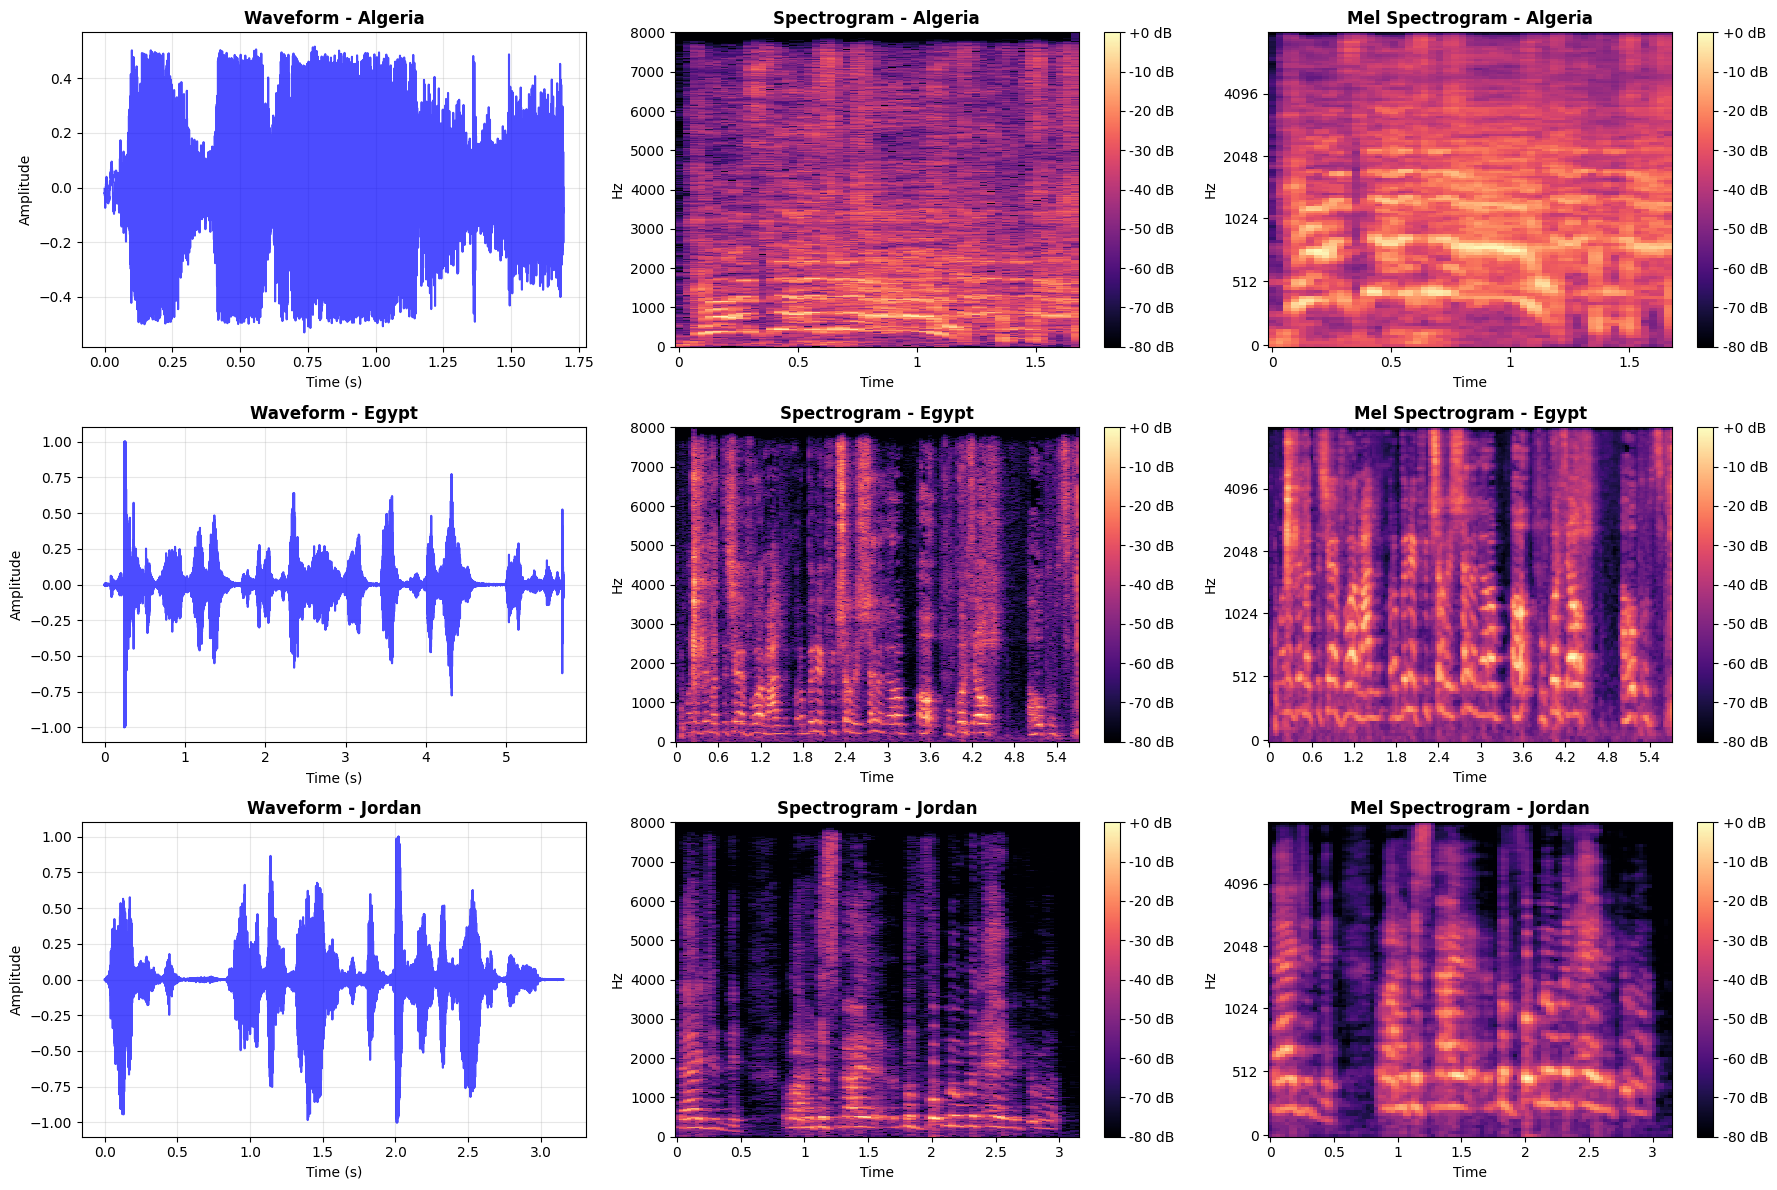


EXPLORATION COMPLETED SUCCESSFULLY!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import librosa
import librosa.display
from datasets import load_dataset
import logging
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

def load_datasets():
    """Load NADI 2025 datasets"""
    logger = logging.getLogger("nadi-explore")
    logger.info("Loading datasets...")

    # Load datasets
    ds_train_val = load_dataset(
        "UBC-NLP/NADI2025_subtask1_SLID",
        token="hf_token",
        trust_remote_code=True
    )

    ds_test = load_dataset(
        "UBC-NLP/NADI2025_subtask1_ADI_Test",
        token="hf_token",
        trust_remote_code=True
    )

    return ds_train_val, ds_test

def explore_basic_statistics(ds_train_val, ds_test):
    """Explore basic dataset statistics"""
    print("="*60)
    print("BASIC DATASET STATISTICS")
    print("="*60)

    # Dataset sizes
    train_size = len(ds_train_val['train'])
    val_size = len(ds_train_val['validation'])
    test_size = len(ds_test['test'])

    print(f"Train set size: {train_size:,}")
    print(f"Validation set size: {val_size:,}")
    print(f"Test set size: {test_size:,}")
    print(f"Total dataset size: {train_size + val_size + test_size:,}")

    # Country/dialect distribution in training and validation sets
    train_countries = [sample['country'] for sample in ds_train_val['train']]
    val_countries = [sample['country'] for sample in ds_train_val['validation']]

    train_counter = Counter(train_countries)
    val_counter = Counter(val_countries)

    print(f"\nNumber of unique countries/dialects:")
    print(f"Train: {len(train_counter)}")
    print(f"Validation: {len(val_counter)}")

    return train_counter, val_counter

def visualize_country_distribution(train_counter, val_counter):
    """Create visualizations for country/dialect distribution"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Arabic Dialect Distribution in NADI 2025 Dataset', fontsize=16, fontweight='bold')

    # Train set distribution - bar plot
    countries = list(train_counter.keys())
    train_counts = list(train_counter.values())

    axes[0, 0].bar(range(len(countries)), train_counts, color='skyblue', alpha=0.7)
    axes[0, 0].set_title('Training Set - Dialect Distribution', fontweight='bold')
    axes[0, 0].set_xlabel('Countries/Dialects')
    axes[0, 0].set_ylabel('Number of Samples')
    axes[0, 0].set_xticks(range(len(countries)))
    axes[0, 0].set_xticklabels(countries, rotation=45, ha='right')
    axes[0, 0].grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for i, v in enumerate(train_counts):
        axes[0, 0].text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

    # Validation set distribution - bar plot
    val_countries = list(val_counter.keys())
    val_counts = list(val_counter.values())

    axes[0, 1].bar(range(len(val_countries)), val_counts, color='lightcoral', alpha=0.7)
    axes[0, 1].set_title('Validation Set - Dialect Distribution', fontweight='bold')
    axes[0, 1].set_xlabel('Countries/Dialects')
    axes[0, 1].set_ylabel('Number of Samples')
    axes[0, 1].set_xticks(range(len(val_countries)))
    axes[0, 1].set_xticklabels(val_countries, rotation=45, ha='right')
    axes[0, 1].grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for i, v in enumerate(val_counts):
        axes[0, 1].text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

    # Combined pie chart for training set
    axes[1, 0].pie(train_counts, labels=countries, autopct='%1.1f%%', startangle=90)
    axes[1, 0].set_title('Training Set - Percentage Distribution', fontweight='bold')

    # Combined pie chart for validation set
    axes[1, 1].pie(val_counts, labels=val_countries, autopct='%1.1f%%', startangle=90)
    axes[1, 1].set_title('Validation Set - Percentage Distribution', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Print detailed statistics
    print("\n" + "="*60)
    print("DETAILED COUNTRY/DIALECT STATISTICS")
    print("="*60)

    print("\nTraining Set:")
    for country, count in train_counter.most_common():
        percentage = (count / sum(train_counter.values())) * 100
        print(f"  {country}: {count:,} samples ({percentage:.1f}%)")

    print("\nValidation Set:")
    for country, count in val_counter.most_common():
        percentage = (count / sum(val_counter.values())) * 100
        print(f"  {country}: {count:,} samples ({percentage:.1f}%)")

def analyze_audio_characteristics(ds_train_val, sample_size=100):
    """Analyze audio characteristics from a sample of the dataset"""
    print("\n" + "="*60)
    print("AUDIO CHARACTERISTICS ANALYSIS")
    print("="*60)

    # Sample audio data for analysis
    print(f"Analyzing audio characteristics from {sample_size} random samples...")

    durations = []
    sample_rates = []
    countries_sampled = []

    # Get random samples from train set
    indices = np.random.choice(len(ds_train_val['train']), size=min(sample_size, len(ds_train_val['train'])), replace=False)

    for i in indices:
        sample = ds_train_val['train'][int(i)]
        audio_data = sample['audio']

        # Extract audio characteristics
        duration = len(audio_data['array']) / audio_data['sampling_rate']
        durations.append(duration)
        sample_rates.append(audio_data['sampling_rate'])
        countries_sampled.append(sample['country'])

    # Statistical analysis
    durations = np.array(durations)
    sample_rates = np.array(sample_rates)

    print(f"\nAudio Duration Statistics:")
    print(f"  Mean duration: {np.mean(durations):.2f} seconds")
    print(f"  Median duration: {np.median(durations):.2f} seconds")
    print(f"  Min duration: {np.min(durations):.2f} seconds")
    print(f"  Max duration: {np.max(durations):.2f} seconds")
    print(f"  Std duration: {np.std(durations):.2f} seconds")

    print(f"\nSample Rate Statistics:")
    unique_rates = np.unique(sample_rates)
    print(f"  Unique sample rates: {unique_rates}")
    print(f"  Most common sample rate: {Counter(sample_rates).most_common(1)[0]}")

    return durations, sample_rates, countries_sampled

def visualize_audio_characteristics(durations, sample_rates, countries_sampled):
    """Create visualizations for audio characteristics"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Audio Characteristics Analysis', fontsize=16, fontweight='bold')

    # Duration distribution
    axes[0, 0].hist(durations, bins=30, color='lightblue', alpha=0.7, edgecolor='black')
    axes[0, 0].set_title('Distribution of Audio Durations', fontweight='bold')
    axes[0, 0].set_xlabel('Duration (seconds)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].grid(axis='y', alpha=0.3)
    axes[0, 0].axvline(np.mean(durations), color='red', linestyle='--', label=f'Mean: {np.mean(durations):.1f}s')
    axes[0, 0].axvline(np.median(durations), color='green', linestyle='--', label=f'Median: {np.median(durations):.1f}s')
    axes[0, 0].legend()

    # Box plot by country (for sampled data)
    country_durations = {}
    for country, duration in zip(countries_sampled, durations):
        if country not in country_durations:
            country_durations[country] = []
        country_durations[country].append(duration)

    countries = list(country_durations.keys())
    duration_lists = [country_durations[country] for country in countries]

    axes[0, 1].boxplot(duration_lists, labels=countries)
    axes[0, 1].set_title('Audio Duration by Dialect', fontweight='bold')
    axes[0, 1].set_xlabel('Dialect/Country')
    axes[0, 1].set_ylabel('Duration (seconds)')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(axis='y', alpha=0.3)

    # Sample rate distribution
    sr_counter = Counter(sample_rates)
    sr_labels, sr_counts = zip(*sr_counter.most_common())

    axes[1, 0].bar(range(len(sr_labels)), sr_counts, color='lightgreen', alpha=0.7)
    axes[1, 0].set_title('Sample Rate Distribution', fontweight='bold')
    axes[1, 0].set_xlabel('Sample Rate (Hz)')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].set_xticks(range(len(sr_labels)))
    axes[1, 0].set_xticklabels([f'{int(sr/1000)}kHz' for sr in sr_labels])
    axes[1, 0].grid(axis='y', alpha=0.3)

    # Duration vs Country scatter plot
    country_colors = plt.cm.tab10(np.linspace(0, 1, len(set(countries_sampled))))
    country_to_color = {country: color for country, color in zip(set(countries_sampled), country_colors)}

    for country in set(countries_sampled):
        country_durations_list = [dur for dur, c in zip(durations, countries_sampled) if c == country]
        country_indices = [i for i, c in enumerate(countries_sampled) if c == country]
        axes[1, 1].scatter(country_indices, country_durations_list,
                          label=country, color=country_to_color[country], alpha=0.7)

    axes[1, 1].set_title('Audio Duration Distribution by Sample', fontweight='bold')
    axes[1, 1].set_xlabel('Sample Index')
    axes[1, 1].set_ylabel('Duration (seconds)')
    axes[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1, 1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

def create_dataset_summary_table(train_counter, val_counter, durations):
    """Create a comprehensive summary table"""
    print("\n" + "="*60)
    print("DATASET SUMMARY TABLE")
    print("="*60)

    # Combine data for summary
    all_countries = set(list(train_counter.keys()) + list(val_counter.keys()))

    summary_data = []
    for country in sorted(all_countries):
        train_count = train_counter.get(country, 0)
        val_count = val_counter.get(country, 0)
        total_count = train_count + val_count

        summary_data.append({
            'Dialect/Country': country,
            'Train Samples': train_count,
            'Val Samples': val_count,
            'Total Samples': total_count,
            'Train %': f"{(train_count / sum(train_counter.values())) * 100:.1f}%" if train_count > 0 else "0.0%",
            'Val %': f"{(val_count / sum(val_counter.values())) * 100:.1f}%" if val_count > 0 else "0.0%"
        })

    # Create DataFrame and display
    df_summary = pd.DataFrame(summary_data)
    print(df_summary.to_string(index=False))

    # Overall statistics
    print(f"\n" + "="*60)
    print("OVERALL STATISTICS")
    print("="*60)
    print(f"Total unique dialects: {len(all_countries)}")
    print(f"Total training samples: {sum(train_counter.values()):,}")
    print(f"Total validation samples: {sum(val_counter.values()):,}")
    print(f"Average samples per dialect: {(sum(train_counter.values()) + sum(val_counter.values())) / len(all_countries):.0f}")
    print(f"Audio duration range: {np.min(durations):.1f}s - {np.max(durations):.1f}s")
    print(f"Average audio duration: {np.mean(durations):.1f}s")

def visualize_sample_audio(ds_train_val, num_samples=3):
    """Visualize sample audio waveforms and spectrograms"""
    print("\n" + "="*60)
    print(f"SAMPLE AUDIO VISUALIZATIONS ({num_samples} samples)")
    print("="*60)

    fig, axes = plt.subplots(num_samples, 3, figsize=(18, 4*num_samples))
    if num_samples == 1:
        axes = axes.reshape(1, -1)

    # Get samples from different countries if possible
    countries_seen = set()
    sample_indices = []

    for i, sample in enumerate(ds_train_val['train']):
        if len(sample_indices) >= num_samples:
            break
        if sample['country'] not in countries_seen or len(countries_seen) >= num_samples:
            sample_indices.append(i)
            countries_seen.add(sample['country'])

    for idx, sample_idx in enumerate(sample_indices):
        sample = ds_train_val['train'][sample_idx]
        audio_data = sample['audio']['array']
        sr = sample['audio']['sampling_rate']
        country = sample['country']

        # Time axis
        time = np.linspace(0, len(audio_data) / sr, len(audio_data))

        # Waveform
        axes[idx, 0].plot(time, audio_data, color='blue', alpha=0.7)
        axes[idx, 0].set_title(f'Waveform - {country}', fontweight='bold')
        axes[idx, 0].set_xlabel('Time (s)')
        axes[idx, 0].set_ylabel('Amplitude')
        axes[idx, 0].grid(True, alpha=0.3)

        # Spectrogram
        D = librosa.amplitude_to_db(np.abs(librosa.stft(audio_data)), ref=np.max)
        img = librosa.display.specshow(D, x_axis='time', y_axis='hz', sr=sr, ax=axes[idx, 1])
        axes[idx, 1].set_title(f'Spectrogram - {country}', fontweight='bold')
        plt.colorbar(img, ax=axes[idx, 1], format='%+2.0f dB')

        # Mel spectrogram
        S = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_mels=128)
        S_dB = librosa.power_to_db(S, ref=np.max)
        img2 = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, ax=axes[idx, 2])
        axes[idx, 2].set_title(f'Mel Spectrogram - {country}', fontweight='bold')
        plt.colorbar(img2, ax=axes[idx, 2], format='%+2.0f dB')

        print(f"Sample {idx+1}: {country} - Duration: {len(audio_data)/sr:.2f}s")

    plt.tight_layout()
    plt.show()

def main():
    """Main exploration function"""
    # Set up logging
    logging.basicConfig(level=logging.INFO, format='[%(levelname)s] %(message)s')

    print("NADI 2025 ARABIC DIALECT IDENTIFICATION")
    print("COMPREHENSIVE DATA EXPLORATION & VISUALIZATION")
    print("="*60)

    try:
        # Load datasets
        ds_train_val, ds_test = load_datasets()

        # Basic statistics and country distribution
        train_counter, val_counter = explore_basic_statistics(ds_train_val, ds_test)

        # Visualize country distribution
        visualize_country_distribution(train_counter, val_counter)

        # Analyze audio characteristics
        durations, sample_rates, countries_sampled = analyze_audio_characteristics(ds_train_val, sample_size=200)

        # Visualize audio characteristics
        visualize_audio_characteristics(durations, sample_rates, countries_sampled)

        # Create summary table
        create_dataset_summary_table(train_counter, val_counter, durations)

        # Visualize sample audio
        visualize_sample_audio(ds_train_val, num_samples=3)

        print("\n" + "="*60)
        print("EXPLORATION COMPLETED SUCCESSFULLY!")
        print("="*60)

    except Exception as e:
        print(f"Error during exploration: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()